# Module 4: Graphs & Plots

In this module you'll learn about:

- Making graphs with Seaborn
- Graph types
    - Bar chart
    - Pie chart
    - Box plot
    - Histogram
    - Scatter plot
    - Line plot
    - Heatmap
- Customising graphs 
- Saving graphs as images


## Installing and Loading Libraries

In the last module, we imported the `os`, `csv` and `pandas` libraries. To be able to use graphs, we also need to import some libraries! We need `pandas` again, to load the data, and also `matplotlib` and `seaborn` for the visualisations. By default, Seaborn is not installed in Anaconda, so we need to install it using the `pip` command. Normally, you would run this command in the command line of your computer, but luckily Jupyter Notebook can also do this for you. To run a command, you simply add an exclamation mark (`!`) in front of whatever you want to run. The following code will install Seaborn (or tell you it's already installed if you run it again):


In [ ]:
!pip install seaborn

Now it is installed, we can import all the libraries:

In [ ]:
# import libraries

# import pandas, for loading data. Use 'pd' to refer to this library
import pandas as pd

# from the matplot library, import only the pyplot section. Use 'plt' to refer to pyplot
from matplotlib import pyplot as plt

# import seaborn, refer to the library as 'sns'
import seaborn as sns


Great! Now we need some data to visualise, let's use the artefacts data again:

In [ ]:
# import csv as dataframe
artefacts = pd.read_csv('../data/artefacts.csv')

# display it, to remind you what the data looks like
artefacts

This spreadsheet contains data from a field survey in the Italian research area Agro Pontino, just south of Rome. Each row is an observation (record) and describes a single artefact as found during the field survey. Artefacts that were discovered during a visit were numbered sequentially. Normally several artefacts are found on a arable field and several adjacent fields might together form one archaeological site. An arable field is often revisited several times to collect more artefacts in order to get a better picture of the site in size, function and date.

## Bar Chart

Imagine we wish to investigate the different find categories (MAT) as they were discovered during the field survey in the Agro Pontino. This would analyse a single (univariate) categorical (nominal) attribute. We would like the visualize both the frequencies (counts) and relative occurrence (overall percentages). Bar charts are good for showing counts over categories, and pie charts are (sort of..) good for showing percentages over categories. Let's make a bar chart first. Seaborn calls this a `countplot`, as we are counting how often each material category occurs:


In [ ]:
# create a bar chart (this puts the plot into Python's memory)
sns.countplot(
    x = 'MAT', # which column to use on the x axis (the categories)
    data = artefacts # where seaborn should look for the data
)

# display the plot (this takes the plot from memory and shows it in your Notebook)
plt.show()

In Excel, you would first have to manually make a pivot table grouping MAT and counting ART, and then create the bar chart by clicking through a couple of options. In Python this is much easier to do as most of the work is done for you. Also, you can read the code to see exactly how a graph is created. And finally, you can recreate the same plot with new updated data very quickly, just re-run the above 2 cells and your graph is done!

The above bar chart is basically a visualisation of grouping 'MAT' and counting 'ART', similar to what we practiced in last module:

In [ ]:
artefacts.groupby('MAT')['ART'].count()

## Pie Chart

The creators of Seaborn haven't included a function to create a pie chart. This is probably because pie charts are not a great visualisation tool, even though they are used a lot! 

The problem is that humans are pretty bad at reading angles. In the below pie chart, try to figure out which group is the biggest one and try to order them by value. 

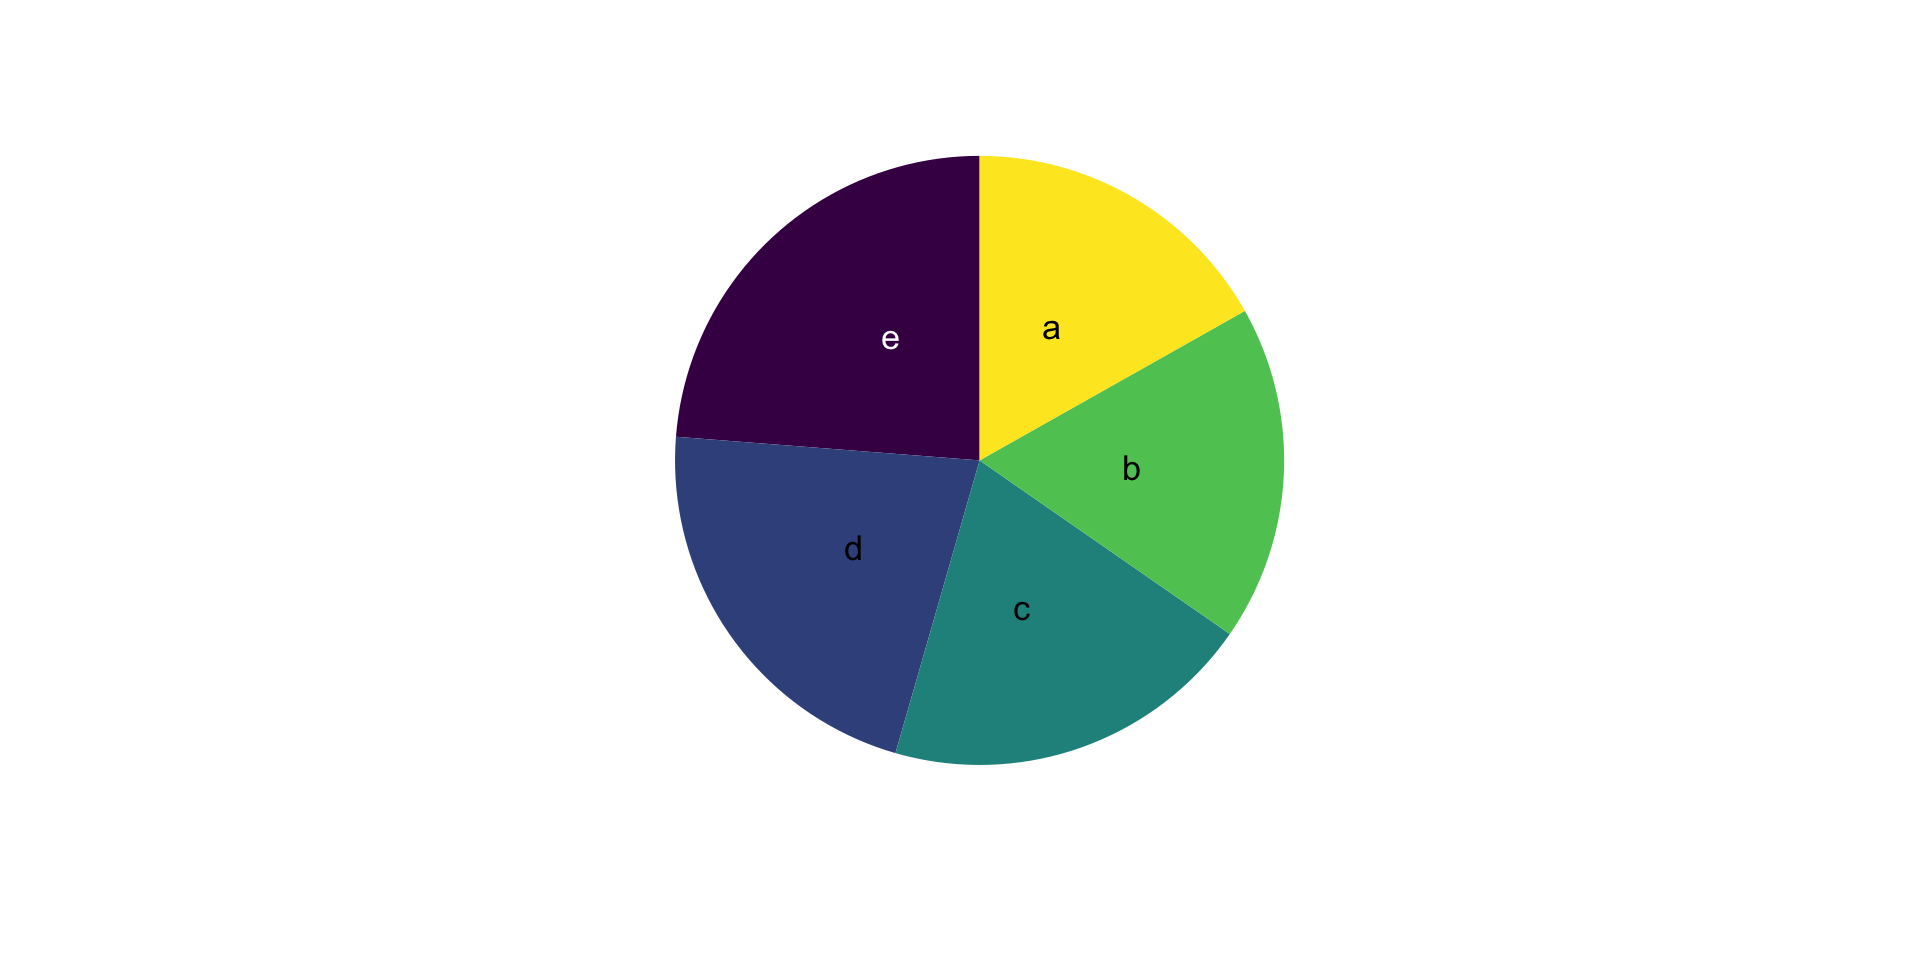

You will probably struggle to do so and this is why pie charts must be avoided. It is much clearer to just use a bar chart! 

But if you for some reason feel like you absolutely *must* make a pie chart (probably because your boss insists on one...), this is how to do it, using `matplotlib`:

In [ ]:
# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7] # seven colours, because we have 7 categories

# create pie chart
plt.pie(
    artefacts.groupby('MAT')['ART'].count(), # data you want to display
    labels = [1, 2, 3, 4, 5, 6, 99], # manually define the category labels
    colors = colors # manually set the colours for the categories
)

# display plot
plt.show()

Which graph is easier to read, the bar chart or the pie chart?

## Box Plot

A box plot uses boxes and whiskers to summarise the distribution of numerical values within categories. Basically, it shows the minimum and maximum value (top and bottom of whiskers), as well as the quartiles and median (within the box). The image below illustrates this.

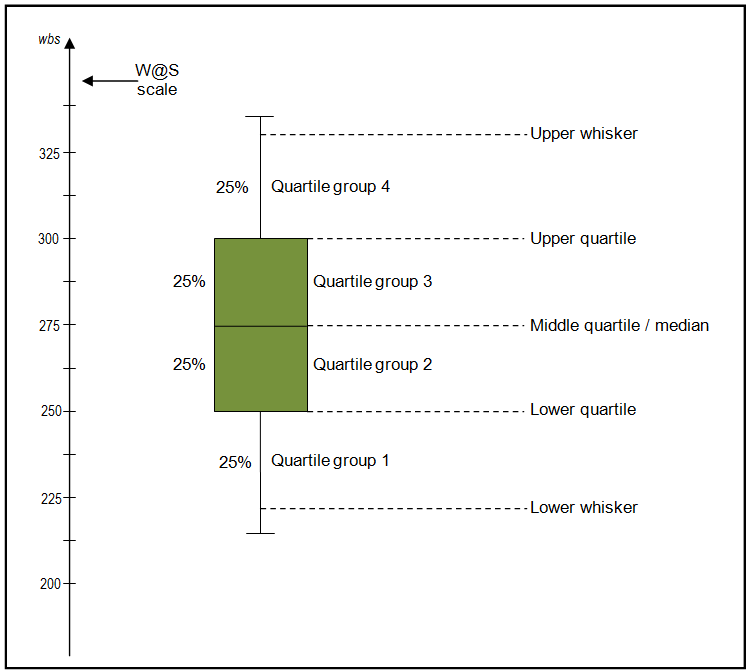

If we wanted to see the boxplot for the distribution of number of finds per visit, we can do that like this:

In [ ]:
# create a box plot
sns.boxplot(
    y="ART", # the variable we want to plot
    data=artefacts # the dataframe to get the variable from
)

# display plot
plt.show()

Similarly, we can plot the distribution of number of finds per material category, by just adding `x='MAT'`:

In [ ]:
# create a box plot
sns.boxplot(
    y="ART", # the variable we want to plot
    x="MAT", # the categories for which we want separate boxplots
    data=artefacts # the dataframe to get the variable from
)

# display plot
plt.show()

We can see that in general, material 1 (flint) is found in much higher quantities than the other material categories.

## Histograms

Histograms look similar to bar charts, but are used for completely different types of data. While in a bar chart, each bar is a distinct category (a nominal or ordinal value), in a histogram each bar represents a so-called *bin* of a number variable (interval or ratio value). The bar simply shows how many times a row contains a value that falls within the start and end range of the bin. This sounds a bit complicated, so let's just work with an example: plotting the X Coordinates (column 'XCOORD') in a histogram:

In [ ]:
# make a histogram
sns.histplot(
    data = artefacts, # which data to use  (notice the order of the arguments doesn't matter?) 
    x = 'XCOORD' # set which column we want to plot
)

# show the plot
plt.show()

What we see here is the distribution of finds over the X Coordinate, so basically, in which areas have we found more/less artefacts. Seaborn has automatically made 11 bars, each bar defined as a range of X Coordinates. Every row that has an X Coordinate that falls within a bar is counted up, and that determines the height of the bar. So for the first bar, this is a count of how many rows have an X Coordinate between 2,349,250 and 2,349,500. This means that bin width is 250 (2349500 - 2349500 = 250).

So Seaborn does some calculations in the background to automatically determine the bin width, using an algoritm designed to optimise the visualisation. But we can also manually set the bin width:

In [ ]:
# make a histogram
sns.histplot(
    data = artefacts, # which data to use  (notice the order of the arguments doesn't matter?) 
    x = 'XCOORD', # set which column we want to plot
    binwidth = 500
)

# show the plot
plt.show()

Play around with the bin width in the above cell and see which gives you the best overview of the distribution.

## Scatter plot

Of course, plotting coordinates in a histogram is not ideal, as they are geographical units that are much better suited to be displayed in 2 dimensions. So let's plot the X and Y coordinates in a scatter plot, which will basically give us a map of sites.

In [ ]:
# make a scatter plot 
sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    data=artefacts
)

# show the plot
plt.show()

Great, that looks like a map with sites! Now imagine we want to see what kind of artefacts are found where, so we want to add in the MAT column. We can show the material by colouring the points. To do this in Seaborn, you simply add `hue=` and the name of the variable:

In [ ]:
# make a scatter plot
sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    hue="MAT",
    data=artefacts
)

# show the plot
plt.show()

Huh, that is strange, the legend shows material from 20 to 80! This is because MAT is a numerical column, and Python assumes you want to show a range of numbers, so it automatically calculates bins. Python hasn't understood that MAT is actually number representing certain categories (nominal). So let's update the DataFrame by changing the MAT numbers to category names, and then plot it again. We'll use slightly different syntax than in last module, to update all the values in one go:

In [ ]:
# update MAT column
artefacts = artefacts.replace({
    'MAT' : { 
        1 : 'flint',
        2 : 'obsidian',
        3 : 'other stone',
        4 : 'whole pebble',
        5 : 'ceramic',
        6 : 'ceramic tile',
        7 : 'metal',
        8 : 'glass',
        9 : 'other',
        10 : 'daub',
        11 : 'solidified sandstone',
        12 : 'quartzite',
        99 : 'unidentified',
    }
})

# make a scatter plot
sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    hue="MAT",
    data=artefacts
)

# show the plot
plt.show()

That's more like it! We can also clarify the difference between the categories even more, by choosing different style points for each category, with the `style` option:

In [ ]:
# make a scatter plot
sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    hue="MAT",
    style="MAT",
    data=artefacts
)

# show the plot
plt.show()

There are many more options to customise your plots, but we'll get back to those a bit further down.

## Line Plots

Line plots are most commonly used to plot a single value which changes over time. As we don't have any time or date element in our `artefacts` data set, we'll use a standard data set you can load via Seaborn: flights. It contains data on the number of flights over 10 years from a particular airport. Let's say we wanted to visualise the increase in the number of flights for the month May:

In [ ]:
# import flights dataset from Seaborn
flights = sns.load_dataset("flights")

# display it, so we can see the data structure
flights

In [ ]:
# select flights in May
may_flights = flights[ flights["month"] == 'May' ]

# make line plot
sns.lineplot(
    data = may_flights, 
    x = "year", 
    y = "passengers"
)
  
# display the plot
plt.show()

Try updating the cell above to show the flights in August. 

The above plot shows just one month, but we can also visualise all 12 months at the same time:

In [ ]:
# make line plot
sns.lineplot(
    data = flights, 
    x = "year", 
    y = "passengers"
)
  
# display the plot
plt.show()

Seaborn was given 12 values for each year (1 for each month) and automatically calculated the average (dark blue line) and the minimum/maximum value (the light blue area). Instead of aggregating the months like this, we can also plot each month separately, again by using the `hue` option:

In [ ]:
# make line plot
sns.lineplot(
    data = flights, 
    x = "year", 
    y = "passengers",
    hue = "month"
)
  
# display the plot
plt.show()

Try and interpret this graph: which season is the busiest with flights?
    
## Heatmaps

When you are trying to visualise 3 variables at the same time, a heatmap is another possible plot. We'll use the flights data again to show what this looks like. We first need to pivot the table so the years are the columns and the months are the rows, and each cell shows the number of flights for that year/month combination. (Don't worry about understanding the `pivot()` function, that's not part of this course)

In [ ]:
# pivot table into right format
flights_pivoted = flights.pivot("month", "year", "passengers")
flights_pivoted

Once it is in this format, Seaborn can easily assign a colour to each value, and make a heatmap:

In [ ]:
# make heatmap
sns.heatmap(flights_pivoted)

# display the plot
plt.show()

This is much easier to interpret than the line plot with 12 lines we created earlier!

## Customising Graphs

While Seaborn does a pretty good job displaying plots in the default colours and styling, specific needs might require some tweaking of the plot styles. We already changed the colour and style of points in the scatter plot above, but there are many more ways you can customise your plots. Let's re-plot the scatter plot from before:

In [ ]:
# make a scatter plot
sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    hue="MAT",
    style="MAT",
    data=artefacts
)

# show the plot
plt.show()

While this gives a good overview of the spatial distribution of the finds, the legend and axes are not clear. Let's fix that, and also add a title and update the style of the plot. For added accessibility, we'll use colours that are easy to distinguish for colorblind people. 

We use a slightly different way of creating the plot: we first set some global options with `sns.set()`, then we make the plot and save it in a new variable (`finds`), and finally add and edit bits of the plot using both `finds` and `plt`. Unfortunately Seaborn can be a bit confusing regarding where you set which option, but you don't need to remember exactly how to do all these tasks, as long as you know the options exist, and can find the correct syntax when you need it!

In [ ]:
# set the style Seaborn should use for plots from now on
sns.set(style='darkgrid')

# set default size of a plot
sns.set(rc = {'figure.figsize':(7,7)})



# make a scatter plot
finds = sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    hue="MAT",
    style="MAT",
    data=artefacts,
    palette="colorblind", # set color palette to colorblind
)


# add title, set 
finds.set(title = 'Finds')

# add x / y axis labels
finds.set(xlabel = "X Coordinate", ylabel = "Y Coordinate")

# rotate x axis tick labels
plt.xticks(rotation=45)

# show full coordinates (don't use scientific '1.0645e6' notation)
plt.ticklabel_format(style = 'plain')

# set legend title
plt.legend(title = 'Material')

# show the plot
plt.show()

That's more like it, it looks ready for publication! 

## Saving Plots

Once you're happy with the way your plot looks, you can export the image in a couple of ways. 

The first is to simply right click the plot in your Notebook, and select 'save as' or 'download as'. This will save the image as a .png image file at the size and quality displayed in your browser. This is fine if you want to quickly share it with someone, but it generally isn't good enough quality to publish (digitally or on paper).

The second way is to tell Seaborn to save the plot as a specific file type and file name, using the `savefig()` function. This way we can control the quality of the image.

In [ ]:
# make a scatter plot
finds = sns.scatterplot(
    x="XCOORD",
    y="YCOORD",
    hue="MAT",
    style="MAT",
    data=artefacts,
    palette="colorblind", # set color palette to colorblind
)


# add title, set 
finds.set(title = 'Finds')

# add x / y axis labels
finds.set(xlabel = "X Coordinate", ylabel = "Y Coordinate")

# rotate x axis tick labels
plt.xticks(rotation=45)

# show full coordinates (don't use scientific '1.0645e6' notation)
plt.ticklabel_format(style = 'plain')

# set legend title
plt.legend(title = 'Material')


# save the figure as a high quality png
plt.savefig(
    'finds-scatterplot.png', # set the filename for the exported image
    dpi=300, # set the dots per inch, which is the quality of the image. 300 is high, 150 is medium, 75 is low
    bbox_inches='tight' # set  the padding around the image
)


The finds-scatterplot.png file has now been saved in your modules folder. Go there and open the image to check everything has worked correctly. 

PNG files are perfectly fine for publishing your plots digitally, but for printed documents, other formats are more suitable, e.g. PDF, SVG or EPS (these are all vector files, which can be printed clearly at any size!).

If you want to save the file in a different image format, you simply update the file extension in the filename. In the cell above, try changing ".png" to ".pdf" and run it again. Check your modules folder and open the newly created PDF, then zoom in as much as you can. You'll see the lines are still sharp and there's no pixelation going on. Try and compare that to the PNG file!

## Exercise

Time to create your own plots! Do the following steps, and make sure to plot each graph in a separate cell:

- Open the spearheads.csv file from the data folder, and load it as a DataFrame
- Make a bar chart with the `countplot` function of Seaborn, showing the number of spearheads for each date
- Make a box plot for the weight variable, visualising the difference in distribution between material (column 'mat') 1 and 2
    - Add a title to the box plot
- Make a histogram for the variable maxle, with a bin width of 5
    - Set the Seaborn style to 'whitegrid'
- Make a scatter plot of maxle vs. weight, with mat as the hue and use palette 'bright'
    - Does the trend in the distribution make sense? Do you think there's a significant difference between mat 1 and 2?
    - Change the x axis label from 'maxle' to 'max length'
    - Change the legend title to 'Material'
    - Optional bonus points: change the legend labels from 1 and 2 to Bronze and Iron ([hint]( https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/))
- Make a line plot with 'date' on the x axis, and 'weight' on the y axis
    - What do you think the light blue areas mean?
    - Looking at this graph, do you see anything interesting archaeologically speaking?
- Make a scatter plot of date vs weight
    - Save the plot as a PDF file 
    - Note: due to quirks with matplotlib, you can't .show() a graph and also use .savefig() in the same cell



In [ ]:
## EXERCISE ##
